In [1]:
import tarfile
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
def extractor(fname):
    rows = []
    tfile = tarfile.open(fname, 'r:gz')
    for member in tfile.getmembers():
        if 'ham' in member.name:
            f = tfile.extractfile(member)
            if f is not None:
                row = f.read()
                rows.append({'message': row, 'class': 'ham'})
        if 'spam' in member.name:
            f = tfile.extractfile(member)
            if f is not None:
                row = f.read()
                rows.append({'message': row, 'class': 'spam'})
    tfile.close()
    return pd.DataFrame(rows)

In [17]:
from string import punctuation
import re

def clean_email(email):
    email = re.sub(r'http\S+', 'link ', email)
    email = re.sub("\d+", " ", email)
    email = re.sub('[$]+', ' dollar ', email)
    email = re.sub('Rs|[₹]+',' rupees ',email) 
    #email = re.sub('www+', ' link ', email)
    #email = re.sub('http+', ' link ', email)
    email = email.replace('\n', ' ')
    email = email.translate(str.maketrans("", "", punctuation))
    email = email.lower()
    return email

#df['message'] = df['message'].apply(clean_email)
#df_test['message'] = df_test['message'].apply(clean_email)

#df.iloc[5171].values

In [18]:
from nltk.stem import WordNetLemmatizer
def Lemmatize(email):
    tokens = word_tokenize(email)
    lemmatizer = WordNetLemmatizer()
    processed = []
    for word in tokens:
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        if len(word)>2:
            processed.append(lemmatizer.lemmatize(word))
    return " ".join(processed)

In [29]:
def processing(path):
    df = extractor(path)
    df['class'] = (df['class'] == 'spam')
    df['class'] = df['class']*1
    df['message'] = df['message'].apply(lambda x: x.decode('latin-1'))
    df = df.reset_index(drop=True)
    df['message'] = df['message'].apply(clean_email)
    df['message'] = df['message'].apply(Lemmatize)
    l = list(df['message'])
    y = df['class'].values
    return l, y

In [73]:
l, y = processing("C:\\Users\\91990\\Downloads\\prml_spam\\enron1.tar.gz")
l1, y1 = processing("C:\\Users\\91990\\Downloads\\prml_spam\\enron2.tar.gz")
l2, y2 = processing("C:\\Users\\91990\\Downloads\\prml_spam\\enron3.tar.gz")

In [106]:
import numpy as np
L = l + l1 + l2
Y = list(y) + list(y1) + list(y2)
Y = np.array(Y)

In [32]:
Y[5171]

1

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
san = TfidfVectorizer()
san.fit_transform(L)

<16541x83080 sparse matrix of type '<class 'numpy.float64'>'
	with 1691451 stored elements in Compressed Sparse Row format>

In [108]:
df_san = pd.DataFrame(san.idf_, index = san.get_feature_names_out(),columns=["idf"]) 
orderedWords = df_san.sort_values(by=['idf'])
orderedWords

,idf
subject,1.000000
the,1.221830
for,1.345887
and,1.377125
you,1.433232
...,...
magsecurities,10.020511
maha,10.020511
mahaffey,10.020511
mahal,10.020511


In [109]:
stopwords = [orderedWords['idf'].index[i] for i in range(20)] 
print(stopwords)

['subject', 'the', 'for', 'and', 'you', 'this', 'have', 'with', 'from', 'that', 'are', 'will', 'your', 'please', 'not', 'enron', 'can', 'our', 'any', 'all']


In [110]:
san_3 = CountVectorizer(stop_words = stopwords, max_features = 4000)
v_san = san_3.fit_transform(L)
#print(v_san[1])
#san_3.get_feature_names_out()
count_array = v_san.toarray()
df = pd.DataFrame(data=count_array,columns = san_3.get_feature_names_out())
df

,abb,ability,able,about,above,absence,absolutely,abuse,academic,accept,...,yet,yield,york,young,yours,yourself,zero,zhiyong,zimin,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16537,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
import numpy as np
To_remove = [] 
for i in range(count_array.shape[0]):
    if np.sum(count_array[i,:])==0:
        To_remove.append(i)
X_real1 = np.delete(count_array, To_remove, axis=0)
y_real1 = np.delete(Y,To_remove)

In [112]:
y_real1.shape

(16501,)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_real1, y_real1, test_size=0.2, shuffle=True, random_state=None, stratify=y_real1)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.9642532565889125


In [115]:
X_train.shape

(13200, 4000)

In [98]:
def NB(X_train, y_train, X_test):
    spam_ind = np.where(y_train == 1)[0]
    ham_ind = np.where(y_train == 0)[0]
    tot = len(y_train)
    spam = len(spam_ind)
    ham = len(ham_ind)
    p_spam = spam/tot
    p_ham = ham/tot

    spam_mails = X_train[spam_ind]
    r = np.ones(shape = (1, X_train.shape[1]))
    spam_mails = np.append(spam_mails, r , axis=0)
    ham_mails = X_train[ham_ind]
    ham_mails = np.append(ham_mails, r , axis=0)
    spam_words = np.zeros(X_train.shape[1])
    ham_words = np.zeros(X_train.shape[1])

    for mail in spam_mails:
        spam_words = spam_words + mail
    for mail in ham_mails:
        ham_words = ham_words + mail

    tot_spam_words = np.sum(spam_words)
    tot_ham_words = np.sum(ham_words)

    p_spam_word = []
    p_ham_word = []

    for i in range(spam_mails.shape[1]):
        s = 0
        for j in range(spam_mails.shape[0]):
            s = s + spam_mails[j][i]
        s = s/tot_spam_words
        p_spam_word.append(s)

    for i in range(ham_mails.shape[1]):
        s = 0
        for j in range(ham_mails.shape[0]):
            s = s + ham_mails[j][i]
        s = s/tot_ham_words
        p_ham_word.append(s)

    y_pred = []

    for i in range(X_test.shape[0]):
        p_test_spam = 0
        p_test_ham = 0
        for j in range(X_test.shape[1]):
            if(X_test[i,j]!=0):
                #if(p_spam_word[j]!=0):
                p_test_spam += np.log(p_spam_word[j])

                #if(p_ham_word[j]!=0):
                p_test_ham += np.log(p_ham_word[j])
            #else:
                #p_test_spam += np.log((1-p_spam_word[j])*p_spam)
                #p_test_ham += np.log((1-p_ham_word[j])*p_ham)
        p_test_spam += np.log(p_spam)
        p_test_ham += np.log(p_ham)
        if(p_test_ham > p_test_spam):
            y_pred.append(0)
        else:
            y_pred.append(1)

    return y_pred
    #len(y_pred)

In [116]:
pred_NB = NB(X_train, y_train, X_test)
len(pred_NB)

3301

In [117]:
len(y_test)

3301

In [118]:
def accuracy(orig, pred):
    return (1 - (np.sum(abs(orig-pred)))/len(pred))*100

In [119]:
acc_NB = accuracy(y_test, pred_NB)
acc_NB

96.75855801272341

In [120]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.9124507724931838


In [121]:
l_test, y_true = processing("C:\\Users\\91990\\Downloads\\prml_spam\\enron4.tar.gz")

In [122]:
#g = ["click this link to join the group chat"]
v = san_3.transform(l_test)
v = v.toarray()
p = NB(X_real1, y_real1, v)
a = accuracy(y_true, p)
a

92.25

In [62]:
v.shape

(6000, 4000)

In [63]:
clf = MultinomialNB()
clf.fit(X_real1, y_real1)
pred = clf.predict(v)
pr = accuracy(y_true, pred)
pr

92.21666666666667

In [123]:
clf = BernoulliNB()
clf.fit(X_real1, y_real1)
pred = clf.predict(v)
pr = accuracy(y_true, pred)
pr

92.51666666666667

Model fitting
0
Model fitting
1
Model fitting
2
Model fitting
3
Model fitting
4
Model fitting
5
Model fitting
6
Model fitting
7
Model fitting
8
Model fitting
9


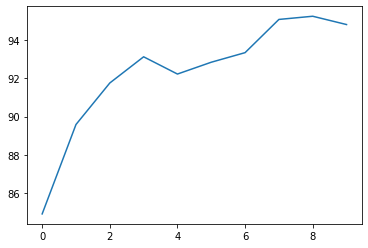

In [76]:
from sklearn import svm
import matplotlib.pyplot as plt
a = []
for i in range(10):
    modelSVM=svm.SVC(C=i+1)
    print("Model fitting")
    modelSVM.fit(X_real1, y_real1)

    #with open('SVM.pkl', 'wb') as f:
        #pickle.dump(modelSVM, f)

    y_pred_svm = modelSVM.predict(v)
    a.append(accuracy(y_true, y_pred_svm))
    print(i)
plt.plot(a)

95.23333333333333


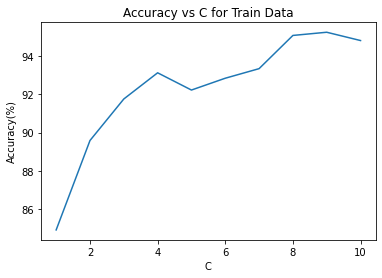

In [83]:
ax = [1, 2, 3, 4, 5, 6 ,7, 8, 9, 10]
plt.plot(ax, a)
plt.xlabel('C')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy vs C for Train Data')
print(a[8])

In [141]:
from sklearn.tree import DecisionTreeClassifier
def bagging(X_train, y_train, X_test):
    n = 200
    models = []
    for i in range(n):
        indexs=np.random.choice(X_train.shape[0], size = 500)# sample with replacement
        Xi=X_train[indexs, :]# Chossing random samples
        Yi=y_train[indexs]
        # Training for each sample bunch by Decision Tree Classifier
        model=DecisionTreeClassifier(max_depth = 1000)
        model.fit(Xi,Yi)
        models.append(model)
        #print(i)
    pred=np.zeros((X_test.shape[0]))
    # predicting with each stored models
    for model in models:
        pred=pred+model.predict(X_test)
    return np.round(pred/n)


In [66]:
p = bagging(X_train, y_train, X_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [67]:
a = accuracy(y_test, p)
a

91.97212965767949

In [68]:
preds = bagging(X_real1, y_real1, v)
print(accuracy(y_true, preds))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
79.76666666666667


In [137]:
#import os
#import glob
#cd = os.getcwd()
#test = os.path.join(cd, 'test')
#q = glob.glob(test + "/*.txt")
#mails = []
#for txt in q:
 #   f = open(txt, 'r')
  #  mail = f.read()
   # mails.append(mail)
#d = pd.DataFrame(mails, columns = ['message'])
#d['message'] = d['message'].apply(lambda x: x.decode('latin-1'))
#d = d.reset_index(drop=True)
#d['message'] = d['message'].apply(clean_email)
#d['message'] = d['message'].apply(Lemmatize)
#l = list(d['message'])
#tr = san_3.transform(l)
#tr = tr.toarray()
#p = NB(X_real1, y_real1, tr)

In [146]:
def fin(model):
    cd = os.getcwd()
    test = os.path.join(cd, 'test')
    q = glob.glob(test + "/*.txt")
    mails = []
    for txt in q:
        f = open(txt, 'r')
        mail = f.read()
        mails.append(mail)
    d = pd.DataFrame(mails, columns = ['message'])
    #d['message'] = d['message'].apply(lambda x: x.decode('latin-1'))
    d = d.reset_index(drop=True)
    d['message'] = d['message'].apply(clean_email)
    d['message'] = d['message'].apply(Lemmatize)
    l = list(d['message'])
    tr = san_3.transform(l)
    tr = tr.toarray()
    if model == 'Naive Bayes':
        return NB(X_real1, y_real1, tr)
    if model == 'Bagging':
        return bagging(X_real1, y_real1, tr)
    if model == 'SVM':
        modelSVM=svm.SVC(C=9)
        modelSVM.fit(X_real1, y_real1)
        y_pred_svm = modelSVM.predict(tr)
        return y_pred_svm

In [149]:
fin("SVM")

array([1, 1])